In [3]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
from sklearn.model_selection import train_test_split,GridSearchCV

In [4]:
df=pd.read_csv("loan_data.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
df.shape

(614, 13)

In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
import missingno as msno

<AxesSubplot:>

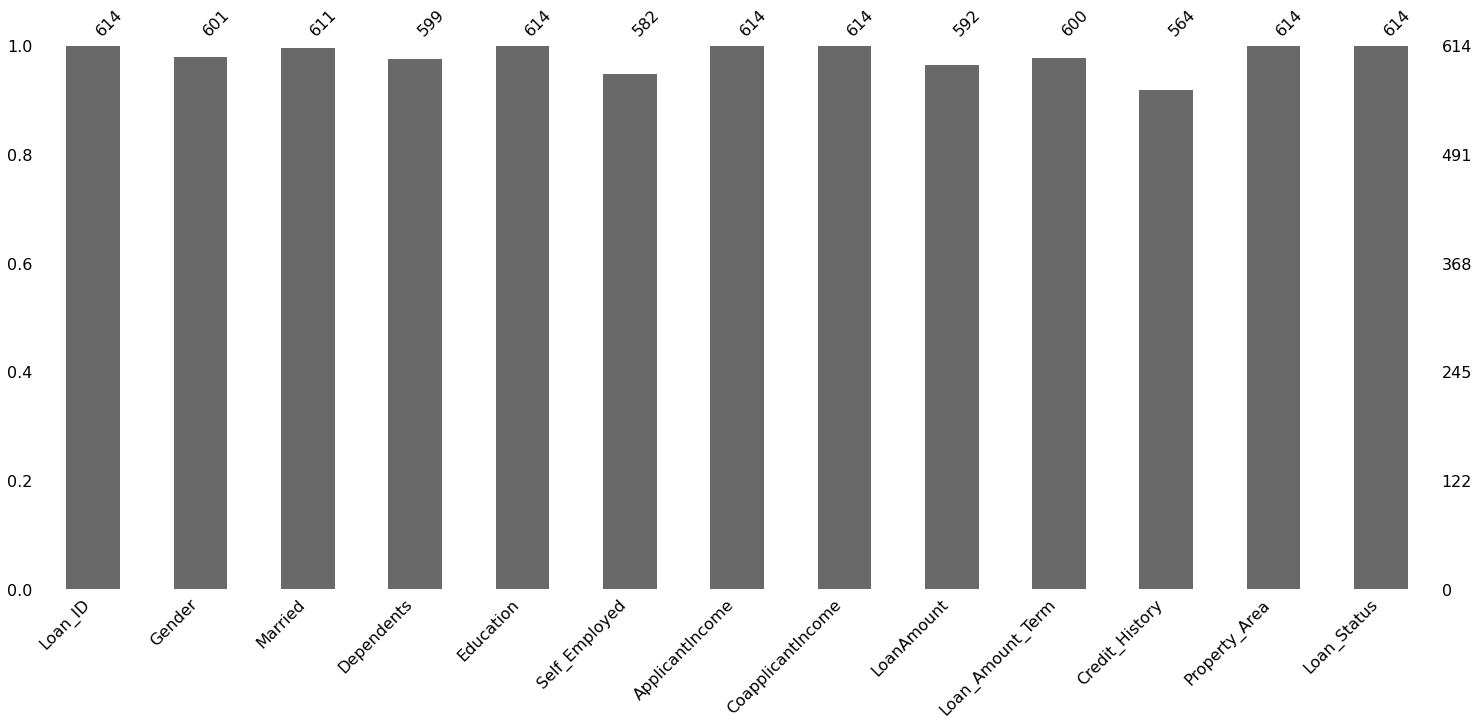

In [8]:
msno.bar(df)

In [9]:
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
df.drop(columns=["Loan_ID"],inplace=True)

In [11]:
for i in df.columns:
    if df[i].isnull().sum()>0:
        if df[i].dtype=="O":
            df[i]=df[i].fillna(df[i].mode()[0])
        else:
             if ((df[i].dtype=="int") or (df[i].dtype=="float")):
                 df[i]=df[i].fillna(df[i].mean())
df.isnull().sum().sum()            

0

In [12]:
df.select_dtypes(include="object").head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [13]:
for i in df.select_dtypes(include="object").columns:
    print(i,"----------------",df[i].unique())

Gender ---------------- ['Male' 'Female']
Married ---------------- ['No' 'Yes']
Dependents ---------------- ['0' '1' '2' '3+']
Education ---------------- ['Graduate' 'Not Graduate']
Self_Employed ---------------- ['No' 'Yes']
Property_Area ---------------- ['Urban' 'Rural' 'Semiurban']
Loan_Status ---------------- ['Y' 'N']


In [14]:
df["Dependents"]=df["Dependents"].replace({"0":0,"1":1,"2":2,"3+":3})

In [15]:
x=df.drop(columns="Loan_Status")
y=df["Loan_Status"]

In [16]:
[i for i in df.columns if df[i].dtype=="O"]

['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [17]:
df1=pd.get_dummies(columns=[i for i in df.columns if df[i].dtype=="O"],drop_first=True,data=df)
df1

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,1,1
1,1,4583,1508.0,128.000000,360.0,1.0,1,1,0,0,0,0,0
2,0,3000,0.0,66.000000,360.0,1.0,1,1,0,1,0,1,1
3,0,2583,2358.0,120.000000,360.0,1.0,1,1,1,0,0,1,1
4,0,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.000000,360.0,1.0,0,0,0,0,0,0,1
610,3,4106,0.0,40.000000,180.0,1.0,1,1,0,0,0,0,1
611,1,8072,240.0,253.000000,360.0,1.0,1,1,0,0,0,1,1
612,2,7583,0.0,187.000000,360.0,1.0,1,1,0,0,0,1,1


In [18]:
x=df1.copy()

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1200)

In [20]:
adc=AdaBoostClassifier()
adc

AdaBoostClassifier()

In [21]:
adc.fit(x_train,y_train)

AdaBoostClassifier()

In [22]:
y_pred=adc.predict(x_test)

In [23]:
accuracy_score(y_test,y_pred)

1.0

In [24]:
accuracy_score(y_test,y_pred)

In [25]:
ac=accuracy_score(y_train,y_pred_train)
ac

1.0

In [26]:
lr=LogisticRegression() 

In [27]:
lr.fit(x_train,y_train) 

C:\Users\ad\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
adc_lr=AdaBoostClassifier(base_estimator=lr)
adc_lr
adc_lr.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=LogisticRegression())

In [29]:
y_pred_lr=adc_lr.predict(x_test)
print(y_pred)

['N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'Y' 'Y' 'N' 'Y'
 'N' 'N' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y'
 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'Y'
 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y'
 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'N'
 'Y' 'Y' 'N' 'Y' 'N' 'N' 'N' 'N' 'Y' 'Y' 'N' 'N' 'N' 'N' 'Y' 'N' 'Y' 'N'
 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y']


In [30]:
y_pred_lr_t=adc_lr.predict(x_train)

In [31]:
ac=accuracy_score(y_test,y_pred_lr)
ac

0.974025974025974

In [32]:
ac=accuracy_score(y_train,y_pred_lr_t)
ac

0.9978260869565218

In [33]:
grid_param = {
    'n_estimators': [10,50,100,500,200],
    'learning_rate' : [0.0001,0.01,0.001,1.0]
   }


In [34]:
grid_search = GridSearchCV(estimator=AdaBoostClassifier(),
                     param_grid=grid_param,
                    n_jobs =-1,cv=10,scoring="accuracy") 


In [35]:
grid_search.fit(x_train,y_train)


GridSearchCV(cv=10, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.01, 0.001, 1.0],
                         'n_estimators': [10, 50, 100, 500, 200]},
             scoring='accuracy')

In [36]:
grid_search.best_score_

1.0

In [37]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'learning_rate': 0.0001, 'n_estimators': 10}


In [38]:
treemodel=AdaBoostClassifier(**best_parameters)
treemodel

AdaBoostClassifier(learning_rate=0.0001, n_estimators=10)

In [39]:
treemodel.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.0001, n_estimators=10)

In [40]:
y_pred=treemodel.predict(x_test)

In [41]:
ac=accuracy_score(y_test,y_pred)
ac

1.0